# UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

1. The data is uniformly distributed on Riemannian manifold 
2. The Riemannian metric is locally constant (or can be approximated as such) 
3. The manifold is locally connected

UMAP has some support for inverse transforms – generating a high dimensional data sample given a location in the low dimensional embedding space.

# Inverse Transforms

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import sklearn.datasets
import umap
import umap.plot

In [2]:
# load MNIST dataset with sklearn's fetch_openml function
data, labels = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
# generate a reduced dimension representation of the data
# instead of using 'fit_transform()' we will use 'fit()'
# so that we can retain the trained model for later to generate new digits based on samples from the embedding space
mapper = umap.UMAP(random_state=42).fit(data)

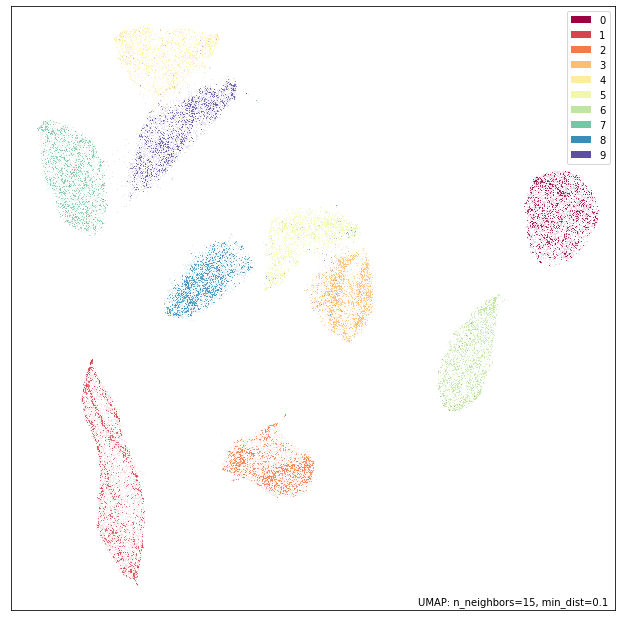

In [4]:
# plot the reduced data
umap.plot.points(mapper, labels=labels)

In [5]:
# embedded space: the space in which the data is embedded after dimensionality reduction
# we’ll generate a grid of samples linearly interpolating between four corner points
# we’ll carefully choose the corners to span over the dataset, and sample different digits so that we can better see the transitions
corners = np.array([
    [-5, -10],  # 1
    [-7, 6],  # 7
    [2, -8],  # 2
    [12, 4],  # 0
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

# Iris Dataset UMAP

In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

iris = load_iris()
print(iris.DESCR)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

import umap

reducer = umap.UMAP()

original = iris.data

embedding = reducer.fit_transform(iris.data)
embedding.shape

#plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the Iris dataset', fontsize=24);

inv_transformed_points = reducer.inverse_transform(embedding)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========